## Early Stopping with Keras Callback

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import keras
from sklearn.datasets import make_moons,make_circles
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

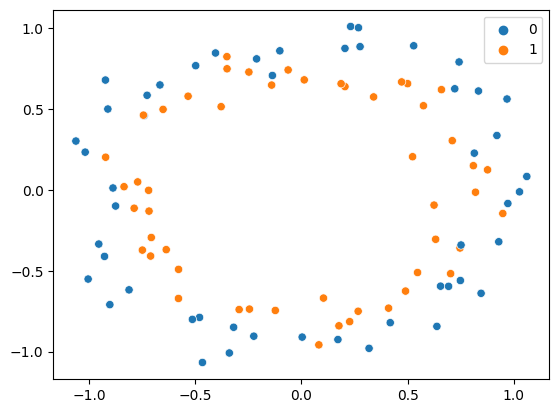

In [14]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

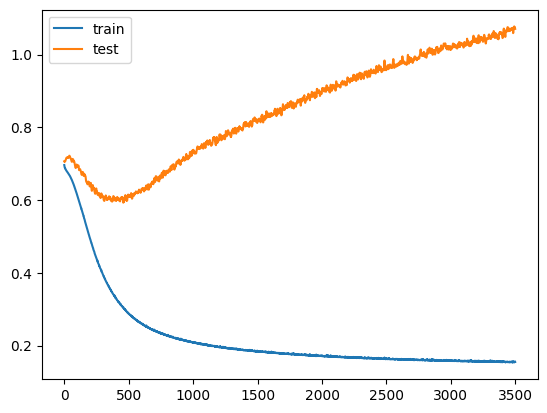

In [16]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Early Stopping

In [17]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)


Epoch 1/3500
3/3 [==============================] - 1s 96ms/step - loss: 0.6947 - accuracy: 0.4625 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 2/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6920 - accuracy: 0.4875 - val_loss: 0.7006 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6912 - accuracy: 0.5125 - val_loss: 0.7024 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6893 - accuracy: 0.5250 - val_loss: 0.7033 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6883 - accuracy: 0.5375 - val_loss: 0.7055 - val_accuracy: 0.3500
Epoch 6/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6875 - accuracy: 0.5250 - val_loss: 0.7079 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6865 - accuracy: 0.5375 - val_loss: 0.7093 - val_accuracy: 0.3500
Epoch 8/3500


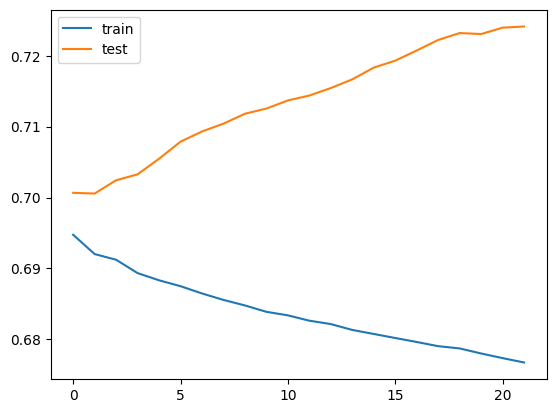

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [19]:
X,y=make_moons(n_samples=300, noise=0.05, random_state=42)

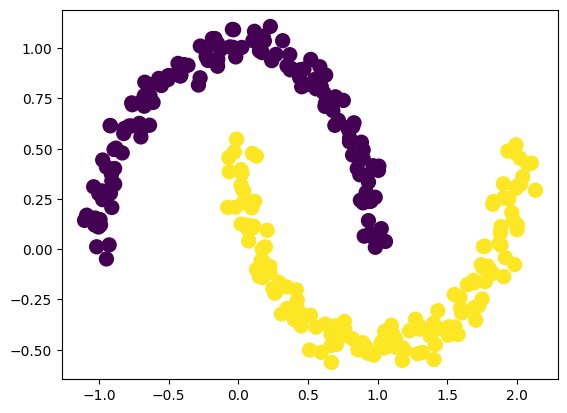

In [20]:
plt.scatter(X[:,0,],X[:,1],c=y,s=100)
plt.show()

In [21]:
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
old_weights = model.get_weights()[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
callback = EarlyStopping(
    monitor="accuracy",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
print(model.fit(X_train, y_train, epochs = 100,callbacks=callback))
new_weights = model.get_weights()[0]
lr=model.optimizer.get_config()["learning_rate"]
gradient = (old_weights - new_weights)/ lr
percent_change = abs(100*(old_weights - new_weights)/ old_weights)
print(gradient,'\n--------------------------------------------------------------------------\n',
percent_change,'\n--------------------------------------------------------------------------\n',
old_weights,'\n--------------------------------------------------------------------------\n',
new_weights)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)               

Here we can observe early stoppage was at 16.

In [22]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
old_weights = model.get_weights()[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
callback = EarlyStopping(
    monitor="accuracy",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
print(model.fit(X_train, y_train, epochs = 100,callbacks=callback))
new_weights = model.get_weights()[0]
lr=model.optimizer.get_config()["learning_rate"]
gradient = (old_weights - new_weights)/ lr
percent_change = abs(100*(old_weights - new_weights)/ old_weights)
print(gradient,'\n--------------------------------------------------------------------------\n',
percent_change,'\n--------------------------------------------------------------------------\n',
old_weights,'\n--------------------------------------------------------------------------\n',
new_weights)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                30        
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy: 0.4833
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6912 - accura

Here we can observe early stoppage was at 11

In [23]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
old_weights = model.get_weights()[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
callback = EarlyStopping(
    monitor="accuracy",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
print(model.fit(X_train, y_train, epochs = 100,callbacks=callback))
new_weights = model.get_weights()[0]
lr=model.optimizer.get_config()["learning_rate"]
gradient = (old_weights - new_weights)/ lr
percent_change = abs(100*(old_weights - new_weights)/ old_weights)
print(gradient,'\n--------------------------------------------------------------------------\n',
percent_change,'\n--------------------------------------------------------------------------\n',
old_weights,'\n--------------------------------------------------------------------------\n',
new_weights)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                30        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 10)               

Here, ReLU's resulted early stoppage was at 24.